In [1]:
import numpy as np
import os
import tensorflow as tf

In [2]:
import pathlib

#dataset_url = "https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri/download/archive.zip"
dataset_url = "file:///Users/c_lin/OneDrive/Documents/Learning/Springboard/Data Science/BrainTumor/archive.zip"
data_dir = tf.keras.utils.get_file(fname='brain_tumor.zip',
                                   origin=dataset_url,
                                   extract=True)
#data_dir = pathlib.Path(data_dir)

### Prepare train and validation datasets

In [3]:
data_dir = pathlib.Path('C:/Users/c_lin/.keras/datasets/Training')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

2870

In [5]:
import PIL.Image as image

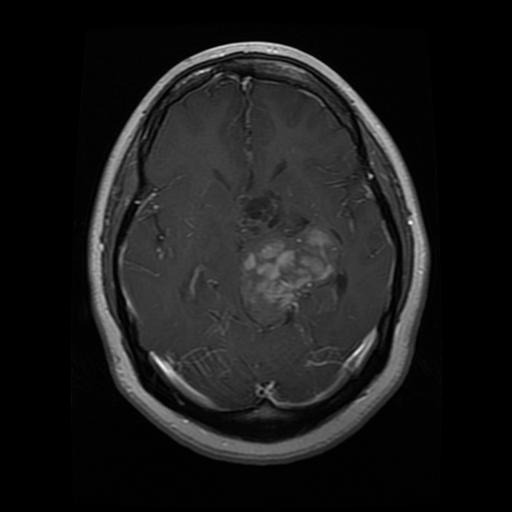

In [6]:
glioma = list(data_dir.glob('glioma_tumor/*'))
image.open(str(glioma[0]))

In [7]:
glioma_0_width, glioma_0_height = image.open(str(glioma[0])).size
glioma_0_width, glioma_0_height

(512, 512)

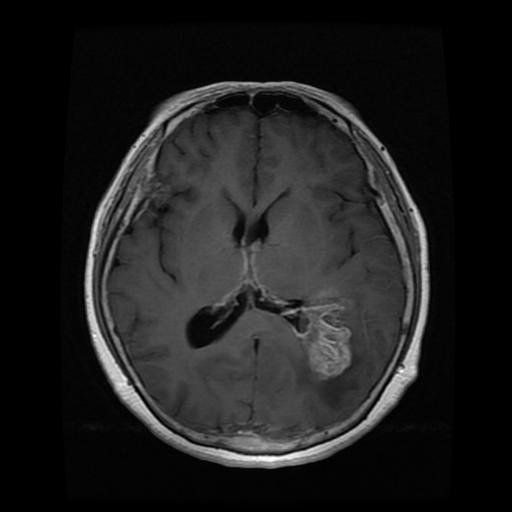

In [8]:
image.open(str(glioma[1]))

In [9]:
glioma_1_width, glioma_1_height = image.open(str(glioma[1])).size
glioma_1_width, glioma_1_height

(512, 512)

In [10]:
# Train dataset

batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.


In [11]:
# Validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [12]:
class_names = train_ds.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

### View the first 9 images from the training dataset

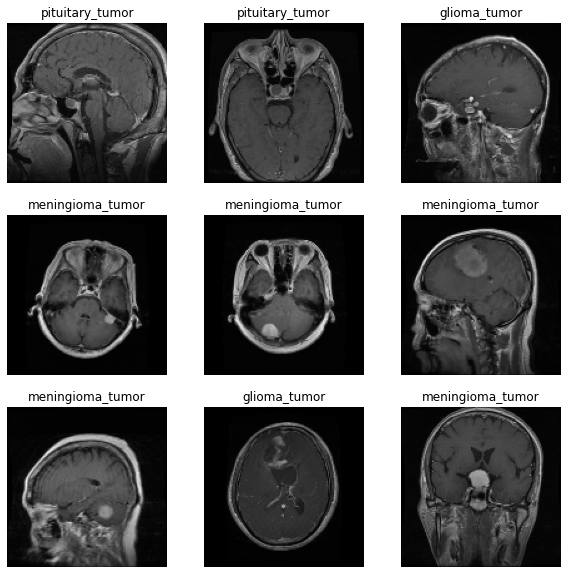

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Training model

In [14]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = 4

model_2_layers = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    
#  tf.keras.layers.Conv2D(32, 3, activation='relu'),
#  tf.keras.layers.MaxPooling2D(),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [17]:
model_2_layers.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
model_2_layers.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
72/72 [==============================] - 57s 781ms/step - loss: 0.8890 - accuracy: 0.6250 - val_loss: 0.6232 - val_accuracy: 0.7334
Epoch 2/10
72/72 [==============================] - 51s 714ms/step - loss: 0.4712 - accuracy: 0.8084 - val_loss: 0.4798 - val_accuracy: 0.8066
Epoch 3/10
72/72 [==============================] - 54s 752ms/step - loss: 0.2332 - accuracy: 0.9207 - val_loss: 0.3938 - val_accuracy: 0.8467
Epoch 4/10
72/72 [==============================] - 54s 748ms/step - loss: 0.1210 - accuracy: 0.9604 - val_loss: 0.5813 - val_accuracy: 0.8153
Epoch 5/10
72/72 [==============================] - 53s 738ms/step - loss: 0.1058 - accuracy: 0.9608 - val_loss: 0.5326 - val_accuracy: 0.8589
Epoch 6/10
72/72 [==============================] - 58s 800ms/step - loss: 0.0768 - accuracy: 0.9730 - val_loss: 0.6058 - val_accuracy: 0.8345
Epoch 7/10
72/72 [==============================] - 60s 833ms/step - loss: 0.0833 - accuracy: 0.9708 - val_loss: 0.6389 - val_accuracy: 0.8380

In [19]:
model_2_layers.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [20]:
#tf.keras.utils.plot_model(model, "brain_tumor_first_model_with_shape_info.png", show_shapes=True)

### Evaluate model performance on the test dataset

In [21]:
data_dir = pathlib.Path('C:/Users/c_lin/.keras/datasets/Testing')

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

394

In [23]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=None,
    subset=None,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 394 files belonging to 4 classes.


In [24]:
test_loss, test_accuracy = model_2_layers.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_accuracy)

13/13 - 3s - loss: 5.3602 - accuracy: 0.7183

Test accuracy: 0.7182741165161133


#### Accuracy comparison:
2 layers model:
Train accuracy: 99.96%
Validation accuracy: 89.37%
Test accuracy: 71.83%.  The model is overfitting.

#### Adding dropout layers to reduce overfitting

In [25]:
model_do = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.5),
    
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.5),
    
#  tf.keras.layers.Conv2D(32, 3, activation='relu'),
#  tf.keras.layers.MaxPooling2D(),
#  tf.keras.layers.Dropout(0.5),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [26]:
model_do.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [27]:
model_do.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
72/72 [==============================] - 65s 899ms/step - loss: 1.2117 - accuracy: 0.4952 - val_loss: 1.0548 - val_accuracy: 0.5976
Epoch 2/10
72/72 [==============================] - 67s 931ms/step - loss: 0.8073 - accuracy: 0.6677 - val_loss: 0.7750 - val_accuracy: 0.6516
Epoch 3/10
72/72 [==============================] - 65s 903ms/step - loss: 0.5471 - accuracy: 0.7779 - val_loss: 0.6421 - val_accuracy: 0.7265
Epoch 4/10
72/72 [==============================] - 64s 884ms/step - loss: 0.3835 - accuracy: 0.8484 - val_loss: 0.4507 - val_accuracy: 0.8258
Epoch 5/10
72/72 [==============================] - 61s 841ms/step - loss: 0.2806 - accuracy: 0.8889 - val_loss: 0.4177 - val_accuracy: 0.8397
Epoch 6/10
72/72 [==============================] - 59s 821ms/step - loss: 0.1965 - accuracy: 0.9212 - val_loss: 0.4406 - val_accuracy: 0.8380
Epoch 7/10
72/72 [==============================] - 59s 820ms/step - loss: 0.1728 - accuracy: 0.9368 - val_loss: 0.4077 - val_accuracy: 0.8589

In [28]:
test_loss, test_accuracy = model_do.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_accuracy)

13/13 - 2s - loss: 3.7302 - accuracy: 0.7056

Test accuracy: 0.7055837512016296


#### Accuracy comparison:
2 layers model:
Train accuracy: 99.96%
Validation accuracy: 89.37%
Test accuracy: 71.83%

2 layers with dropout model:
Train accuracy: 97.17%
Validation accuracy: 89.37%
Test accuracy: 70.56%. 